---
# <font color="DarkBlue"><b><center>Optimization</center></b></font>
---
## <font color="DarkGreen"><center>Ransomware dynamics: Mitigating personal data exfiltration through the SCIRAS lens</font>

### <center>**Minimization Dynamic Problem**<center>

**Author:** David Cevallos-Salas, José Estrada-Jiménez, Danny S. Guamán, Luis Felipe Urquiza<br>
**Date:** 2025-03-22


In this notebook is optimized the Model's Dynamic Problem

In [ ]:
try:
    from gekko import GEKKO
except:
    !pip install gekko
    from gekko import GEKKO

!pip show gekko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 62.3 MB/s eta 0:00:00
Name: gekko
Version: 1.2.1
Summary: Machine learning and optimization for dynamic systems
Home-page: https://github.com/BYU-PRISM/GEKKO
Author: BYU PRISM Lab
Author-email: support@apmonitor.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy
Required-by: 


In [ ]:
# -----------------------------
# TESLACRYPT
# -----------------------------

# Additional modules
import numpy as np
import matplotlib.pyplot as plt

# Concrete model
m = GEKKO(remote=True)

# Time parameters
tf = 100
n= 100
m.time = np.linspace (0,tf,n)
fc = 1e4

# Model parameters
N = 1000
Ni = 50
Nc = 10

alpha0 = 0.97
alpha1 = 0
alpha_hor = 0.95
alpha_it = 0.97
alpha_sca = 0.97
fa = 4

xi = 0.1e-6

delta_v = 0
delta_c = 0
delta_s = 0
delta_op = 0.9
fd = 1
delta = 1/fd*(delta_v+delta_c+delta_s+delta_op)

gamma = 1e-2
beta = 5e-6

nu_b = 5e-2
nu_rto = 5e-2
nu_amd = 5e-2
fnu = 3
nu = 1/fnu * (nu_b+nu_rto+nu_amd)

epsilon0 = 5.4e-3
epsilon_aip = 0

omega = 5e-3
kappa = 1e-2

# State variables
alpha = m.Var(value=alpha0+alpha1)
s = m.Var(value=N-Ni-Nc)
i = m.Var(value=Ni)
c = m.Var(value=Nc)
a = m.Var(value=0)
r = m.Var(value=0)
g = m.Var(value=0)
e = m.Var(value=0)

# Independent variables
bc = m.Var(lb=0,ub=1)
bi = m.Var(lb=0,ub=1)

# Ordinary Differential Equations
m.Equation(alpha == 1/fa*((alpha0+alpha1)/(1+xi*(i+c))+alpha_hor+alpha_it+alpha_sca))
m.Equation(s.dt() == e*r-alpha*s*(i+c)-nu*s)
m.Equation(c.dt() == alpha*(1-delta)*s*(i+c)-bc*c)
m.Equation(i.dt() == alpha*delta*s*(i+c)-bi*i-gamma*i)
m.Equation(a.dt() == gamma*i-beta*a)
m.Equation(r.dt() == bc*c+bi*i+nu*s-e*r+beta*a+kappa*g)
m.Equation(g.dt() == omega*a-kappa*g)
m.Equation(e.dt() == epsilon0+epsilon_aip*(alpha0+alpha1)/(1+xi*(i+c)))

# Objective function
R = m.Var()
Rf = m.FV()
Rf.STATUS = 1
m.Connection(Rf,R, pos2="end")
m.Equation(R * fc == alpha*N*(bi+gamma+omega+bc*delta \
            -(bi+gamma+omega)*delta)/(bc*(bi+delta)*(nu+epsilon0)))
m.Equation(bi <= bc)
m.Obj(Rf)

# Solver options (Optimal Control)
m.options.max_iter = 5000
nodes = 1
m.options.IMODE = 6
m.options.NODES = nodes-1
m.options.SOLVER = 3
m.solve(disp=False)

# Print results
print("Optimal: " + str(Rf.value[1]))
print("bi: " + str(sum([bi.value[1]]+[1]*(nodes-1))/len([bi.value[1]]+[1]*(nodes-1))))
print("bc: " + str(sum([bc.value[1]]+[1]*(nodes-1))/len([bc.value[1]]+[1]*(nodes-1))))



Optimal: 0.91815266473
bi: 0.22544617866
bc: 0.74002282556


In [ ]:
# -----------------------------
# RYUK
# -----------------------------

# Concrete model
m = GEKKO(remote=True)

# Time parameters
tf = 100
n= 100
m.time = np.linspace (0,tf,n)
fc = 1e4

# Model parameters
N = 1000
Ni = 50
Nc = 10

alpha0 = 0
alpha1 = 0.913
alpha_hor = 0.97
alpha_it = 0.95
alpha_sca = 0.97
fa = 4

xi = 0.1e-6

delta_v = 0.9
delta_c = 0.95
delta_s = 0.95
delta_op = 0.9
fd = 4
delta = 1/fd*(delta_v+delta_c+delta_s+delta_op)

gamma = 1e-2
beta = 5e-6

nu_b = 5e-2
nu_rto = 5e-2
nu_amd = 5e-2
fnu = 3
nu = 1/fnu * (nu_b+nu_rto+nu_amd)

epsilon0 = 5.4e-3
epsilon_aip = 1e-2

omega = 5.5e-3
kappa = 1

# State variables
alpha = m.Var(value=alpha0+alpha1)
s = m.Var(value=N-Ni-Nc)
i = m.Var(value=Ni)
c = m.Var(value=Nc)
a = m.Var(value=0)
r = m.Var(value=0)
g = m.Var(value=0)
e = m.Var(value=0)

# Independent variables
bc = m.Var(lb=0,ub=1)
bi = m.Var(lb=0,ub=1)

# Ordinary Differential Equations
m.Equation(alpha == 1/fa*((alpha0+alpha1)/(1+xi*(i+c))+alpha_hor+alpha_it+alpha_sca))
m.Equation(s.dt() == e*r-alpha*s*(i+c)-nu*s)
m.Equation(c.dt() == alpha*(1-delta)*s*(i+c)-bc*c)
m.Equation(i.dt() == alpha*delta*s*(i+c)-bi*i-gamma*i)
m.Equation(a.dt() == gamma*i-beta*a)
m.Equation(r.dt() == bc*c+bi*i+nu*s-e*r+beta*a+kappa*g)
m.Equation(g.dt() == omega*a-kappa*g)
m.Equation(e.dt() == epsilon0+epsilon_aip*(alpha0+alpha1)/(1+xi*(i+c)))

# Objective function
R1 = m.Var()
Rf = m.FV()
Rf.STATUS = 1
m.Connection(Rf,R1, pos2="end")
m.Equation(R1 * fc == alpha*N*(bi+gamma+omega+bc*delta \
            -(bi+gamma+omega)*delta)/(bc*(bi+delta)*(nu+epsilon0)))
m.Equation(bi <= bc)
m.Obj(Rf)

# Solver options (Optimal Control)
m.options.max_iter = 5000
nodes = 5
m.options.IMODE = 6
m.options.NODES = nodes-1
m.options.SOLVER = 3
m.solve(disp=False)

# Print results
print("Optimal: " + str(Rf.value[1]))
print("bi: " + str(sum([bi.value[1]]+[1]*(nodes))/len([bi.value[1]]+[1]*(nodes))))
print("bc: " + str(sum([bc.value[1]]+[1]*(nodes))/len([bc.value[1]]+[1]*(nodes))))


Optimal: 0.89253115009
bi: 0.8794265790466667
bc: 0.9537729185249999


In [ ]:
# -----------------------------
# MOVEIT (CLOP)
# -----------------------------

# Concrete model
m = GEKKO(remote=True)

# Time parameters
tf = 100
n= 100
m.time = np.linspace (0,tf,n)
fc = 1e4

# Model parameters
N = 1000
Ni = 50
Nc = 10

alpha0 = 0
alpha1 = 0.988
alpha_hor = 0.97
alpha_it = 0.98
alpha_sca = 0.97
fa = 4

xi = 0.1e-6

delta_v = 0.95
delta_c = 0.95
delta_s = 0.95
delta_op = 0.9
fd = 4
delta = 1/fd*(delta_v+delta_c+delta_s+delta_op)

gamma = 1e-2
beta = 5e-6

nu_b = 5e-2
nu_rto = 5e-2
nu_amd = 5e-2
fnu = 3
nu = 1/fnu * (nu_b+nu_rto+nu_amd)

epsilon0 = 5.4e-3
epsilon_aip = 1.3e-2

omega = 5.5e-3
kappa = 0.99

# State variables
alpha = m.Var(value=alpha0+alpha1)
s = m.Var(value=N-Ni-Nc)
i = m.Var(value=Ni)
c = m.Var(value=Nc)
a = m.Var(value=0)
r = m.Var(value=0)
g = m.Var(value=0)
e = m.Var(value=0)

# Independent variables
bc = m.Var(lb=0,ub=1)
bi = m.Var(lb=0,ub=1)

# Ordinary Differential Equations
m.Equation(alpha == 1/fa*((alpha0+alpha1)/(1+xi*(i+c))+alpha_hor+alpha_it+alpha_sca))
m.Equation(s.dt() == e*r-alpha*s*(i+c)-nu*s)
m.Equation(c.dt() == alpha*(1-delta)*s*(i+c)-bc*c)
m.Equation(i.dt() == alpha*delta*s*(i+c)-bi*i-gamma*i)
m.Equation(a.dt() == gamma*i-beta*a)
m.Equation(r.dt() == bc*c+bi*i+nu*s-e*r+beta*a+kappa*g)
m.Equation(g.dt() == omega*a-kappa*g)
m.Equation(e.dt() == epsilon0+epsilon_aip*(alpha0+alpha1)/(1+xi*(i+c)))

# Objective function
R2 = m.Var()
Rf = m.FV()
Rf.STATUS = 1
m.Connection(Rf,R2, pos2="end")
m.Equation(R2 * fc == alpha*N*(bi+gamma+omega+bc*delta \
            -(bi+gamma+omega)*delta)/(bc*(bi+delta)*(nu+epsilon0)))
m.Equation(bi <= bc)
m.Obj(Rf)

# Solver options (Optimal Control)
m.options.max_iter = 5000
nodes = 4
m.options.IMODE = 6
m.options.NODES = nodes-1
m.options.SOLVER = 3
m.solve(disp=False)

# Print results
print("Optimal: " + str(Rf.value[1]))
print("bi: " + str(sum([bi.value[1]]+[1]*(nodes))/len([bi.value[1]]+[1]*(nodes))))
print("bc: " + str(sum([bc.value[1]]+[1]*(nodes))/len([bc.value[1]]+[1]*(nodes))))

Optimal: 0.91107804725
bi: 0.855286771584
bc: 0.944710074896


In [ ]:
# -----------------------------
# CONTI
# -----------------------------

# Concrete model
m = GEKKO(remote=True)

# Time parameters
tf = 100
n= 100
m.time = np.linspace (0,tf,n)
fc = 1e4

# Model parameters
N = 1000
Ni = 50
Nc = 10

alpha0 = 0
alpha1 = 0.978
alpha_hor = 0.96
alpha_it = 0.98
alpha_sca = 0.97
fa = 4

xi = 0.1e-6

delta_v = 0.95
delta_c = 0.95
delta_s = 0.95
delta_op = 0.9
fd = 4
delta = 1/fd*(delta_v+delta_c+delta_s+delta_op)

gamma = 1e-2
beta = 5e-6

nu_b = 5e-2
nu_rto = 5e-2
nu_amd = 5e-2
fnu = 3
nu = 1/fnu * (nu_b+nu_rto+nu_amd)

epsilon0 = 5.4e-3
epsilon_aip = 1.8e-2

omega = 5.5e-3
kappa = 0.9

# State variables
alpha = m.Var(value=alpha0+alpha1)
s = m.Var(value=N-Ni-Nc)
i = m.Var(value=Ni)
c = m.Var(value=Nc)
a = m.Var(value=0)
r = m.Var(value=0)
g = m.Var(value=0)
e = m.Var(value=0)

# Independent variables
bc = m.Var(lb=0,ub=1)
bi = m.Var(lb=0,ub=1)

# Ordinary Differential Equations
m.Equation(alpha == 1/fa*((alpha0+alpha1)/(1+xi*(i+c))+alpha_hor+alpha_it+alpha_sca))
m.Equation(s.dt() == e*r-alpha*s*(i+c)-nu*s)
m.Equation(c.dt() == alpha*(1-delta)*s*(i+c)-bc*c)
m.Equation(i.dt() == alpha*delta*s*(i+c)-bi*i-gamma*i)
m.Equation(a.dt() == gamma*i-beta*a)
m.Equation(r.dt() == bc*c+bi*i+nu*s-e*r+beta*a+kappa*g)
m.Equation(g.dt() == omega*a-kappa*g)
m.Equation(e.dt() == epsilon0+epsilon_aip*(alpha0+alpha1)/(1+xi*(i+c)))

# Objective function
R3 = m.Var()
Rf = m.FV()
Rf.STATUS = 1
m.Connection(Rf,R3, pos2="end")
m.Equation(R3 * fc == alpha*N*(bi+gamma+omega+bc*delta \
            -(bi+gamma+omega)*delta)/(bc*(bi+delta)*(nu+epsilon0)))
m.Equation(bi <= bc)
m.Obj(Rf)

# Solver options (Optimal Control)
m.options.max_iter = 5000
nodes = 2
m.options.IMODE = 6
m.options.NODES = nodes-1
m.options.SOLVER = 3
m.solve(disp=False)

# Print results
print("Optimal: " + str(Rf.value[1]))
print("bi: " + str(sum([bi.value[1]]+[1]*(nodes))/len([bi.value[1]]+[1]*(nodes))))
print("bc: " + str(sum([bc.value[1]]+[1]*(nodes))/len([bc.value[1]]+[1]*(nodes))))

Optimal: 0.90641927989
bi: 0.7585650940266667
bc: 0.90712181144


In [ ]:
# -----------------------------
# LOCKBIT
# -----------------------------

# Concrete model
m = GEKKO(remote=True)

# Time parameters
tf = 100
n= 100
m.time = np.linspace (0,tf,n)
fc = 1e4

# Model parameters
N = 1000
Ni = 50
Nc = 10

alpha0 = 0
alpha1 = 0.944
alpha_hor = 0.9
alpha_it = 0.97
alpha_sca = 0.9
fa = 4

xi = 0.1e-6

delta_v = 0.9
delta_c = 0.95
delta_s = 0.95
delta_op = 0.9
fd = 4
delta = 1/fd*(delta_v+delta_c+delta_s+delta_op)

gamma = 1e-2
beta = 5e-6

nu_b = 5e-2
nu_rto = 5e-2
nu_amd = 5e-2
fnu = 3
nu = 1/fnu * (nu_b+nu_rto+nu_amd)

epsilon0 = 5.4e-3
epsilon_aip = 1.1e-2

omega = 5.5e-3
kappa = 0.95

# State variables
alpha = m.Var(value=alpha0+alpha1)
s = m.Var(value=N-Ni-Nc)
i = m.Var(value=Ni)
c = m.Var(value=Nc)
a = m.Var(value=0)
r = m.Var(value=0)
g = m.Var(value=0)
e = m.Var(value=0)

# Independent variables
bc = m.Var(lb=0,ub=1)
bi = m.Var(lb=0,ub=1)

# Ordinary Differential Equations
m.Equation(alpha == 1/fa*((alpha0+alpha1)/(1+xi*(i+c))+alpha_hor+alpha_it+alpha_sca))
m.Equation(s.dt() == e*r-alpha*s*(i+c)-nu*s)
m.Equation(c.dt() == alpha*(1-delta)*s*(i+c)-bc*c)
m.Equation(i.dt() == alpha*delta*s*(i+c)-bi*i-gamma*i)
m.Equation(a.dt() == gamma*i-beta*a)
m.Equation(r.dt() == bc*c+bi*i+nu*s-e*r+beta*a+kappa*g)
m.Equation(g.dt() == omega*a-kappa*g)
m.Equation(e.dt() == epsilon0+epsilon_aip*(alpha0+alpha1)/(1+xi*(i+c)))

# Objective function
R4 = m.Var()
Rf = m.FV()
Rf.STATUS = 1
m.Connection(Rf,R4, pos2="end")
m.Equation(R4 * fc == alpha*N*(bi+gamma+omega+bc*delta \
            -(bi+gamma+omega)*delta)/(bc*(bi+delta)*(nu+epsilon0)))
m.Equation(bi <= bc)
m.Obj(Rf)

# Solver options (Optimal Control)
m.options.max_iter = 5000
nodes = 6
m.options.IMODE = 6
m.options.NODES = nodes-1
m.options.SOLVER = 3
m.solve(disp=False)

# Print results
print("Optimal: " + str(Rf.value[1]))
print("bi: " + str(sum([bi.value[1]]+[1]*(nodes))/len([bi.value[1]]+[1]*(nodes))))
print("bc: " + str(sum([bc.value[1]]+[1]*(nodes))/len([bc.value[1]]+[1]*(nodes))))

Optimal: 0.87164098204
bi: 0.8966272558957142
bc: 0.9605139291042857


**Pictures print**

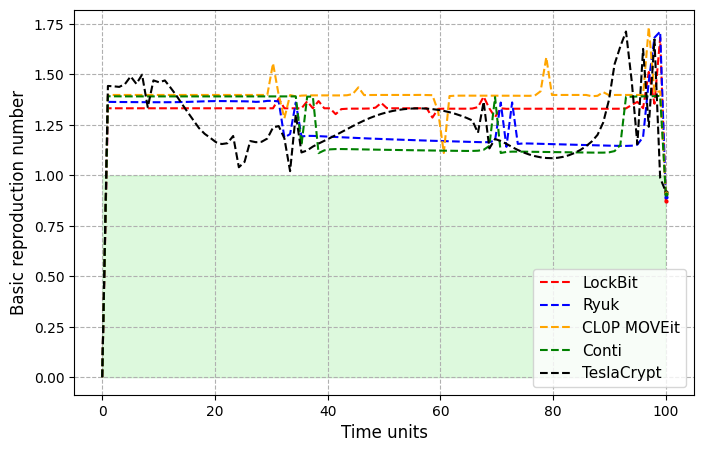

In [ ]:
# Plot Basic reproduction number
x_fill = np.arange(0,tf,0.1)
limit = 1*np.ones(len(x_fill))
plt.rcParams["figure.figsize"] = [8,5]
fig,ax = plt.subplots(1)
ax.grid(linestyle="--")

plt.plot (m.time , R4.value, "--", color="red", label="LockBit",)
plt.plot (m.time , R1.value, "--", color="blue", label = "Ryuk")
plt.plot (m.time , R2.value, "--", color="orange", label="CL0P MOVEit")
plt.plot (m.time , R3.value, "--", color="green", label="Conti")
plt.plot (m.time , R.value, "--", color="black" , label = "TeslaCrypt")

plt.xlabel("Time units", fontsize=12)
plt.ylabel("Basic reproduction number", fontsize=12)
plt.plot(m.time[n-1], R.value[n-1], 'o', color="black", markersize="2")
plt.plot(m.time[n-1], R1.value[n-1], 'o', color="blue", markersize="2")
plt.plot(m.time[n-1], R2.value[n-1], 'o', color="orange", markersize="2")
plt.plot(m.time[n-1], R3.value[n-1], 'o', color="green", markersize="2")
plt.plot(m.time[n-1], R4.value[n-1], 'o', color="red", markersize="2")


plt.fill_between(x_fill, limit, color="lightgreen", alpha=0.3)
plt.legend(loc="lower right", prop={'size': 11})
plt.show()
#plt.savefig("Min_RN.png")

